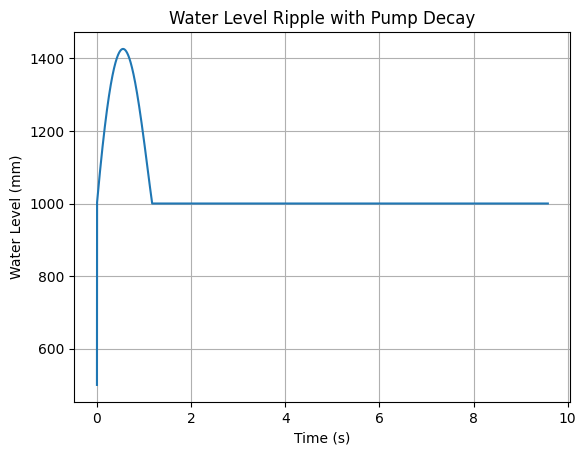

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81
HR = 1.0
theta_1 = 1
theta_2 = 0.02
theta_3 = 0.75
dtau = 0.001
n_steps = 30000
decay_start = 10000
decay_factor = 0.999929

# Initialize arrays
y = np.zeros(n_steps)
V = np.zeros(n_steps)

# Initial conditions
y[0] = 0.5
V[0] = 0.455

# Simulation
for i in range(1, n_steps):
    # Apply decay if pump is shutting off
    decayed_V = V[i-1] * decay_factor if i >= decay_start else V[i-1]
    gravity_term = (1 / y[i-1]) - 1
    damping_term = (theta_2 + (theta_3 / y[i-1])) * decayed_V**2
    V[i] = decayed_V + (gravity_term + theta_1 * damping_term) * dtau
    y[i] = y[i-1] + decayed_V * dtau




    gravity_term = (1 / y[i-1]) - 1
    damping_term = - (theta_2 + theta_3 / y[i-1]) * abs(V[i-1]) * V[i-1]
    V[i] = V[i-1] + (gravity_term + theta_1 * damping_term) * dtau
    y[i] = y[i-1] + V[i-1] * dtau
    y[i] = max(y[i], 1.0)  # Ensure y does not go negative

# Convert normalized time to real time
tau = np.arange(n_steps) * dtau
t_real = tau / np.sqrt(g / HR)

# Plot
plt.plot(t_real, y * HR * 1000)
plt.xlabel("Time (s)")
plt.ylabel("Water Level (mm)")
plt.title("Water Level Ripple with Pump Decay")
plt.grid()
plt.show()

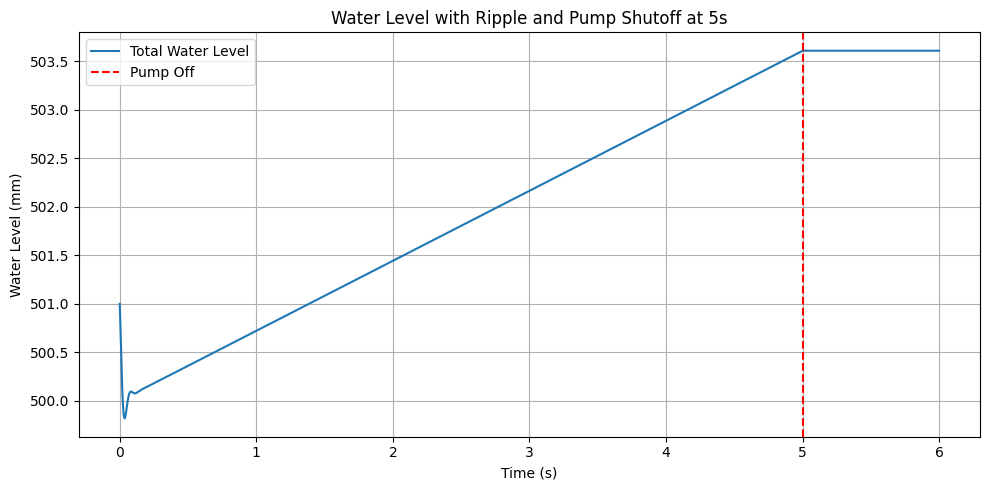

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------
# Constants and parameters
# --------------------------------------
g = 9.81                # gravity (m/s^2)
rho = 1000              # water density (kg/m^3)
sigma = 0.0728          # surface tension (N/m)
H = 1.0                 # max tank height (m)
A0 = 0.001              # ripple amplitude (m)
lambda_damp = 40        # damping coefficient (1/s)
flow_rate_m3_hr = 2.6   # inlet flow rate
tank_area_m2 = 1.0      # tank area
lambda_wave = 0.02      # wavelength (m)

# Initial tank height
initial_height = 0.5  # in meters

# Convert flow rate
flow_rate_m3_s = flow_rate_m3_hr / 3600
bulk_rise_rate = flow_rate_m3_s / tank_area_m2  # m/s

# Wave frequency from dispersion relation
k = 2 * np.pi / lambda_wave
omega = np.sqrt(k * (g + (sigma / rho) * k**2) * np.tanh(k * H))

# --------------------------------------
# Simulation parameters
# --------------------------------------
t_max = 6.0   # simulate for 6 seconds
dt = 0.001
t = np.arange(0, t_max, dt)
pump_off_time = 5.0  # pump runs for 5 seconds

# --------------------------------------
# Compute water levels
# --------------------------------------
# Bulk rise: linear until pump_off_time, then constant
bulk = np.where(t < pump_off_time, initial_height + bulk_rise_rate * t,
                initial_height + bulk_rise_rate * pump_off_time)

# Ripple: always decaying
ripple = A0 * np.exp(-lambda_damp * t) * np.cos(omega * t)

# Total water level
total_height = bulk + ripple

# --------------------------------------
# Plot
# --------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(t, total_height * 1000, label='Total Water Level')  # mm
plt.axvline(pump_off_time, color='red', linestyle='--', label='Pump Off')
plt.xlabel("Time (s)")
plt.ylabel("Water Level (mm)")
plt.title("Water Level with Ripple and Pump Shutoff at 5s")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()